In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from TVA1_UU import TVA1_UU as BHDVCS
import plotly.graph_objects as go

In [14]:
dats = pd.read_csv('dvcs_xs_May-2021_342_sets.csv')
n = np.array(dats['#Set'])
ind = np.array(dats['index'])
k = np.array(dats['k'])
qq = np.array(dats['QQ'])
xb = np.array(dats['x_b'])
t = np.array(dats['t'])
phi = np.array(dats['phi_x'])
F = np.array(dats['F'])
errF = np.array(dats['sigmaF'])
varF = np.array(dats['varF']) 
F1 = np.array(dats['F1'])
F2 = np.array(dats['F2'])
const = np.array(dats['dvcs'])

bhdvcs = BHDVCS()

In [4]:
def cffplot(setNum, itemsInSet = 45):
    cffs = pd.read_csv("Results"+str(setNum)+".csv")
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    ReHfit = np.mean(cffs["ReH"])
    ReEfit = np.mean(cffs["ReE"])
    ReHTfit = np.mean(cffs["ReHtilde"])
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    plt.plot(phi[a:b], F[a:b], 'ko', label='data')
    plt.plot(phi[a:b], bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit), 'r-', label='fit')
    rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
    print(rmse)
    plt.title("set "+str(setNum+1))
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    plt.show()

In [5]:
def cffplot(setNum, itemsInSet = 45):
    cffs = pd.read_csv("Results"+str(setNum)+".csv")
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    ReHfit = np.mean(cffs["ReH"])
    ReEfit = np.mean(cffs["ReE"])
    ReHTfit = np.mean(cffs["ReHtilde"])
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=phi[a:b], y=F[a:b], mode='markers'))
    fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit), mode='lines'))
    rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))

    fig.add_annotation(text="RMSE: "+str(rmse),showarrow=False)
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=False,width=800,height=800)
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    fig.show()

In [74]:
def meanrmse(setNum, itemsInSet = 45):
    tot = 0
    for x in range(0, setNum):
        cffs = pd.read_csv("Results"+str(x)+".csv")
        a = x*itemsInSet
        b = (x+1)*itemsInSet-1
        ReHfit = np.mean(cffs["ReH"])
        ReEfit = np.mean(cffs["ReE"])
        ReHTfit = np.mean(cffs["ReHtilde"])
        xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
        rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
        tot = tot + rmse
        #print(rmse)
    #print(tot)
    print(tot/setNum)

meanrmse(10)

0.014184401294108561


In [5]:
def cffdistplot(setNum):
    data = pd.DataFrame(columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
    for x in range(0,setNum):
        cffs = pd.read_csv("Results"+str(x)+".csv")
        ReHfit = np.mean(cffs["ReH"])
        ReEfit = np.mean(cffs["ReE"])
        ReHTfit = np.mean(cffs["ReHtilde"])
        size = cffs["ReH"].size
        size = 1
        ReHe = np.std(cffs["ReH"])/math.sqrt(size)
        ReEe = np.std(cffs["ReE"])/math.sqrt(size)
        ReHTe = np.std(cffs["ReHtilde"])/math.sqrt(size)
        cff = pd.DataFrame([[x+1, ReHfit, ReHe, ReEfit, ReEe, ReHTfit, ReHTe]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
        data=data.append(cff)
    rehfig = go.Figure()
    rehfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReH"]), error_y=dict(type='data', array=np.array(data["ReHe"]), visible=True),mode='markers'))
    rehfig.update_layout(template="plotly_dark",title_text="ReH",showlegend=False)
    rehfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehfig.show()
    reefig = go.Figure()
    reefig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReE"]), error_y=dict(type='data', array=np.array(data["ReEe"]), visible=True),mode='markers'))
    reefig.update_layout(template="plotly_dark",title_text="ReE",showlegend=False)
    reefig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    reefig.show()
    rehtfig = go.Figure()
    rehtfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReHT"]), error_y=dict(type='data', array=np.array(data["ReHTe"]), visible=True),mode='markers'))
    rehtfig.update_layout(template="plotly_dark",title_text="ReHT",showlegend=False)
    rehtfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehtfig.show()
    print(data)

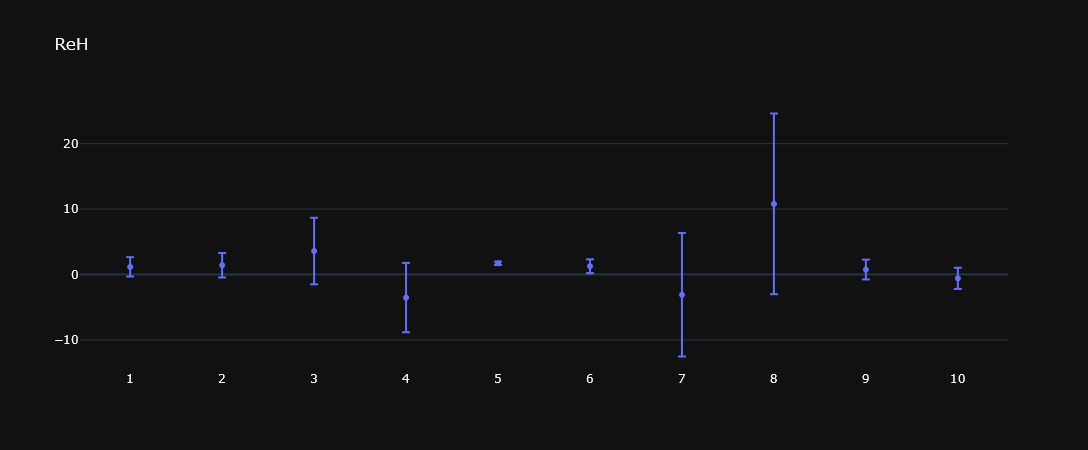

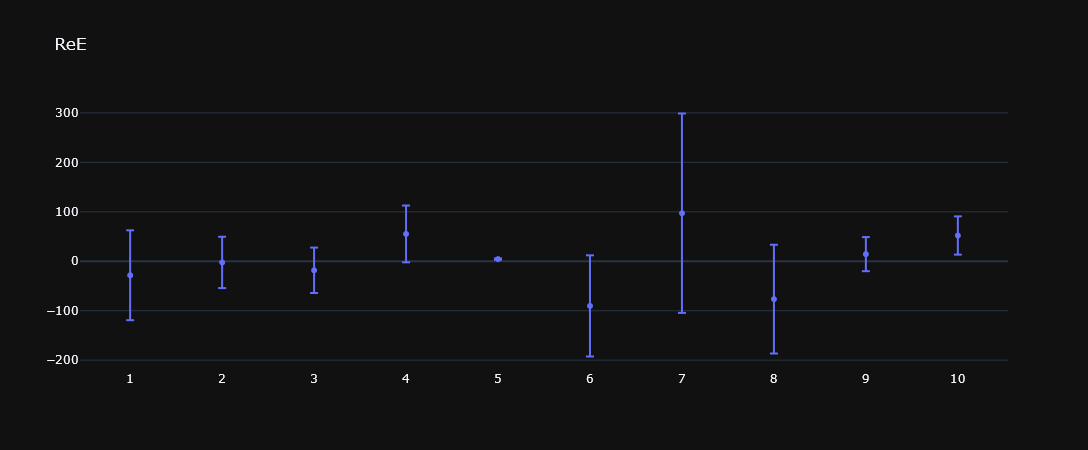

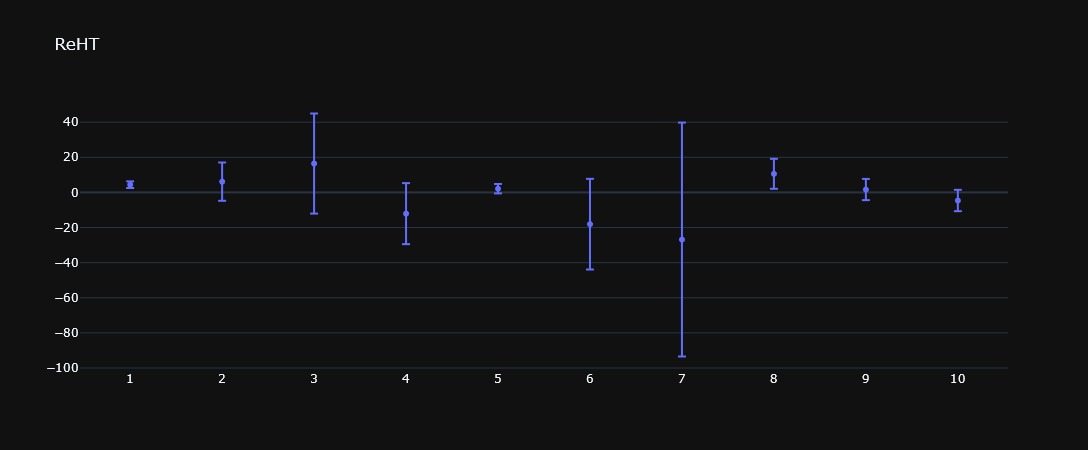

  set        ReH       ReHe        ReE        ReEe       ReHT      ReHTe
0   1   1.160714   1.479803 -28.296238   90.845785   4.400403   1.896061
0   2   1.412072   1.873040  -2.352640   51.884346   6.128330  10.908839
0   3   3.577724   5.086013 -18.276599   45.918724  16.439851  28.500471
0   4  -3.535010   5.302315  55.276692   57.421058 -12.082618  17.380714
0   5   1.710261   0.263470   4.442779    1.363749   2.122093   2.675140
0   6   1.256756   1.060795 -90.282076  102.274820 -18.087322  25.819695
0   7  -3.104178   9.440478  97.173298  201.566467 -26.839920  66.610704
0   8  10.795787  13.813817 -76.570015  109.953328  10.603368   8.545152
0   9   0.748301   1.515786  14.424163   34.488385   1.639068   6.048886
0  10  -0.594211   1.618765  52.095036   38.687003  -4.605943   6.085060


In [6]:
cffdistplot(10)

In [12]:
p=pd.DataFrame([[1, 1, 1, 1, 1, 1, 1]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
p=p.append(pd.DataFrame([[2, 1, 1, 1, 1, 1, 1]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe']))
print(p)

   set  ReH  ReHe  ReE  ReEe  ReHT  ReHTe
0    1    1     1    1     1     1      1
0    2    1     1    1     1     1      1


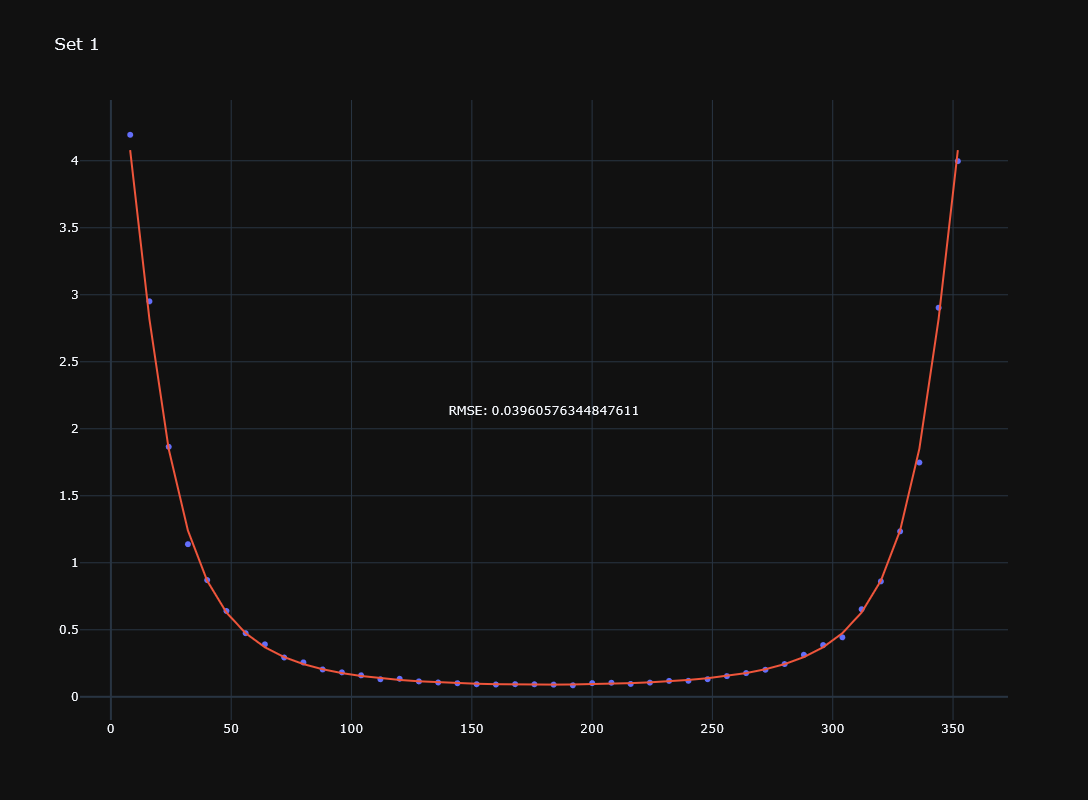

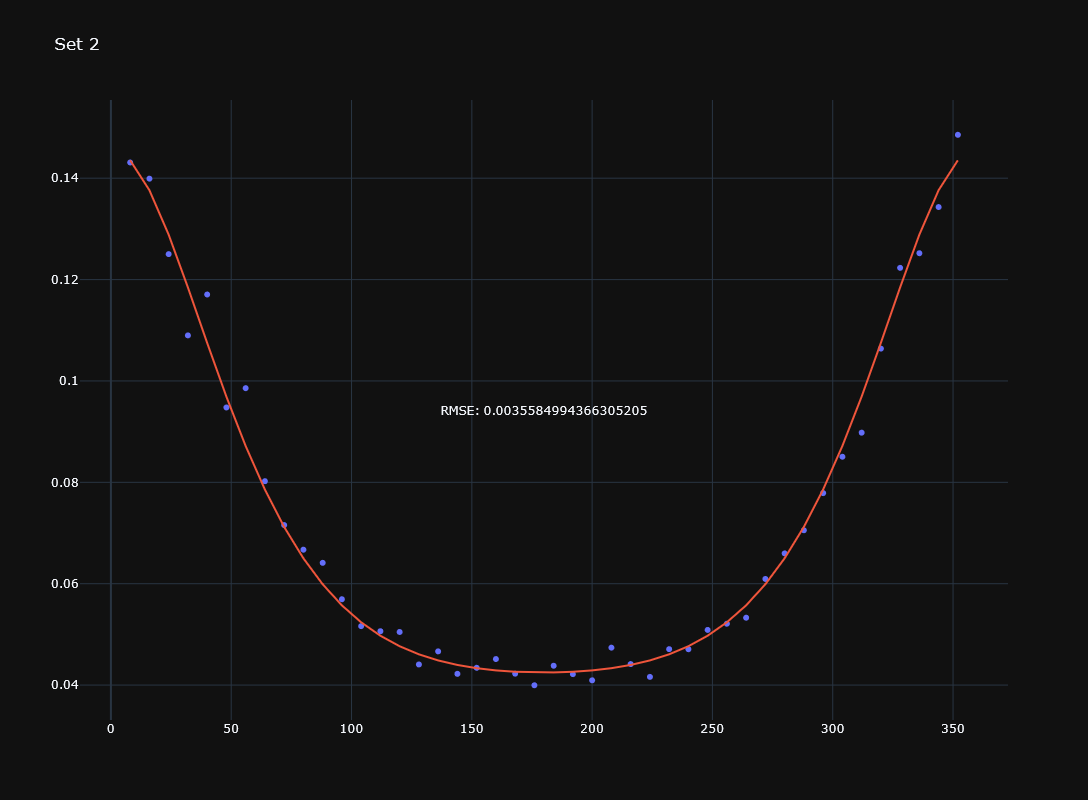

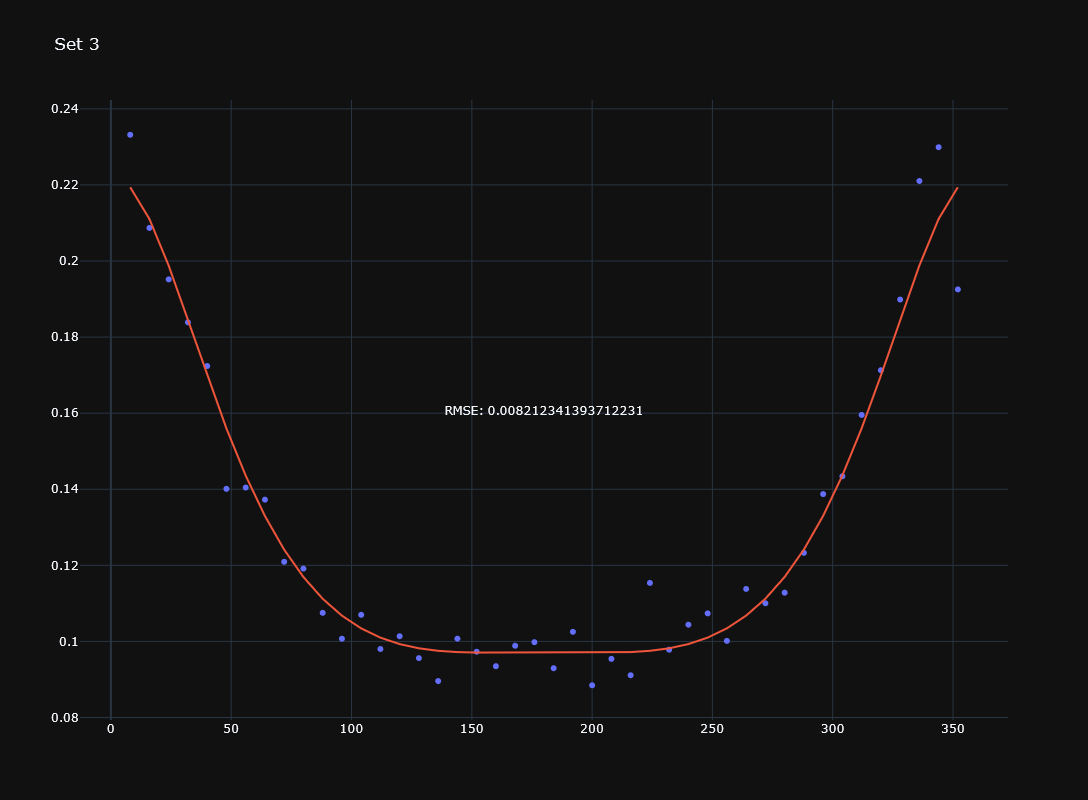

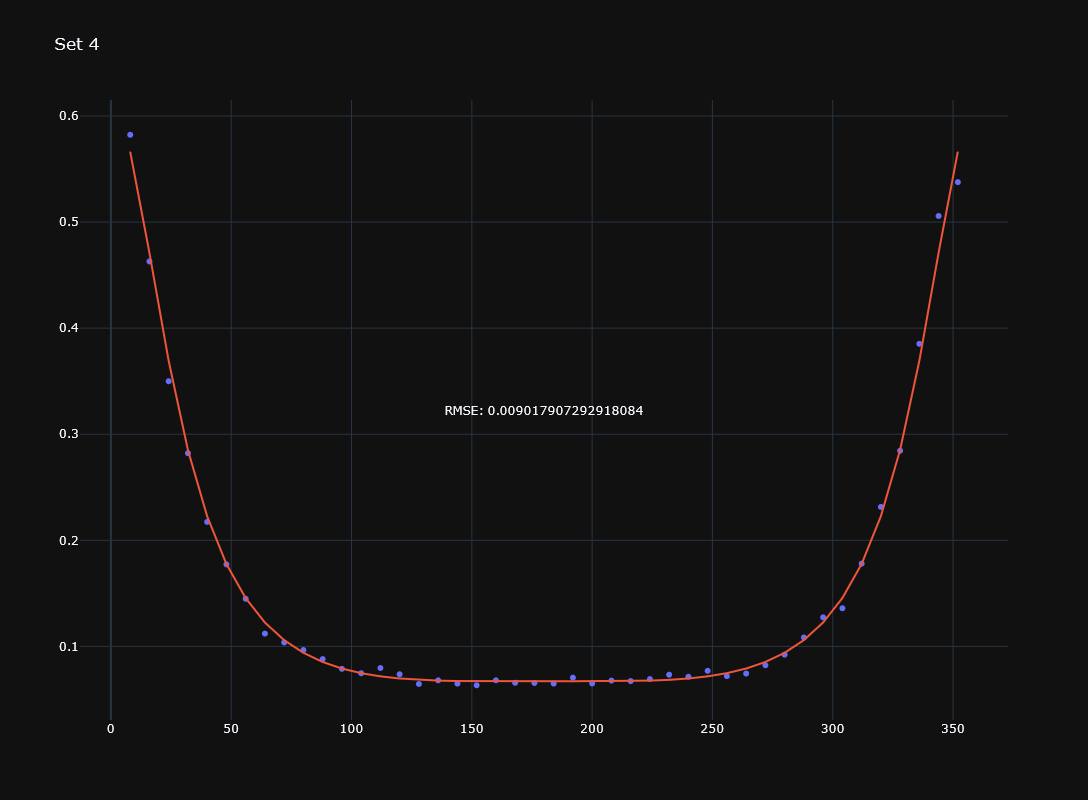

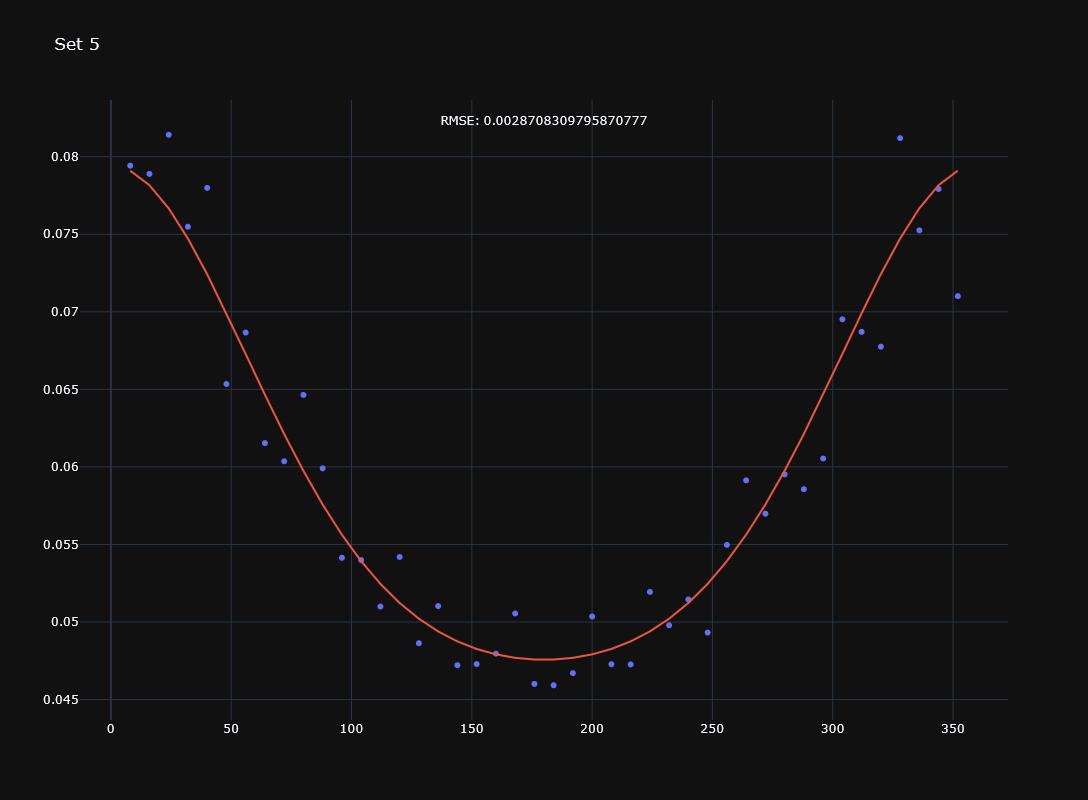

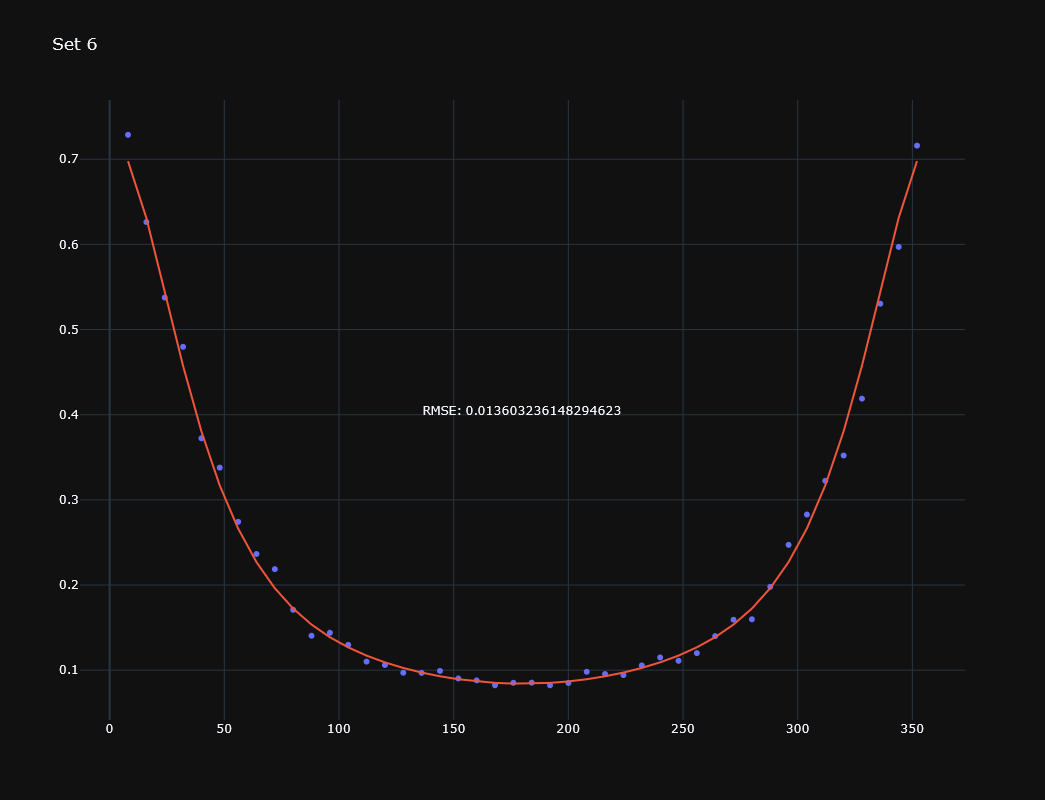

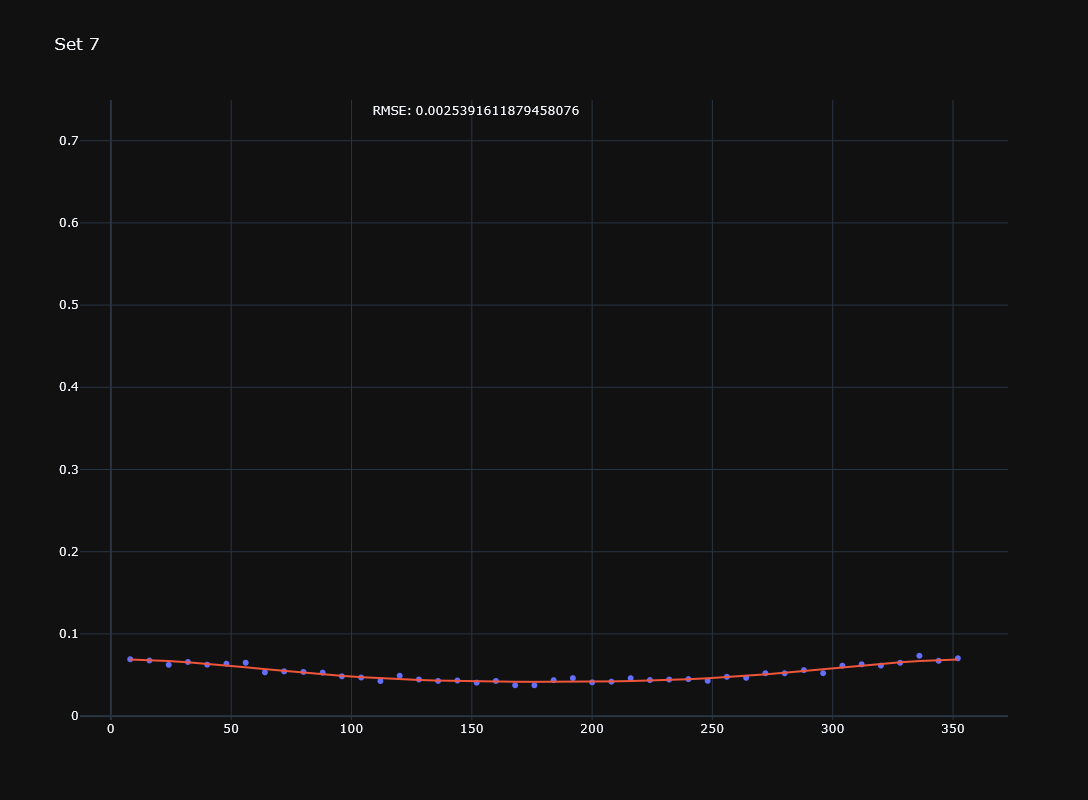

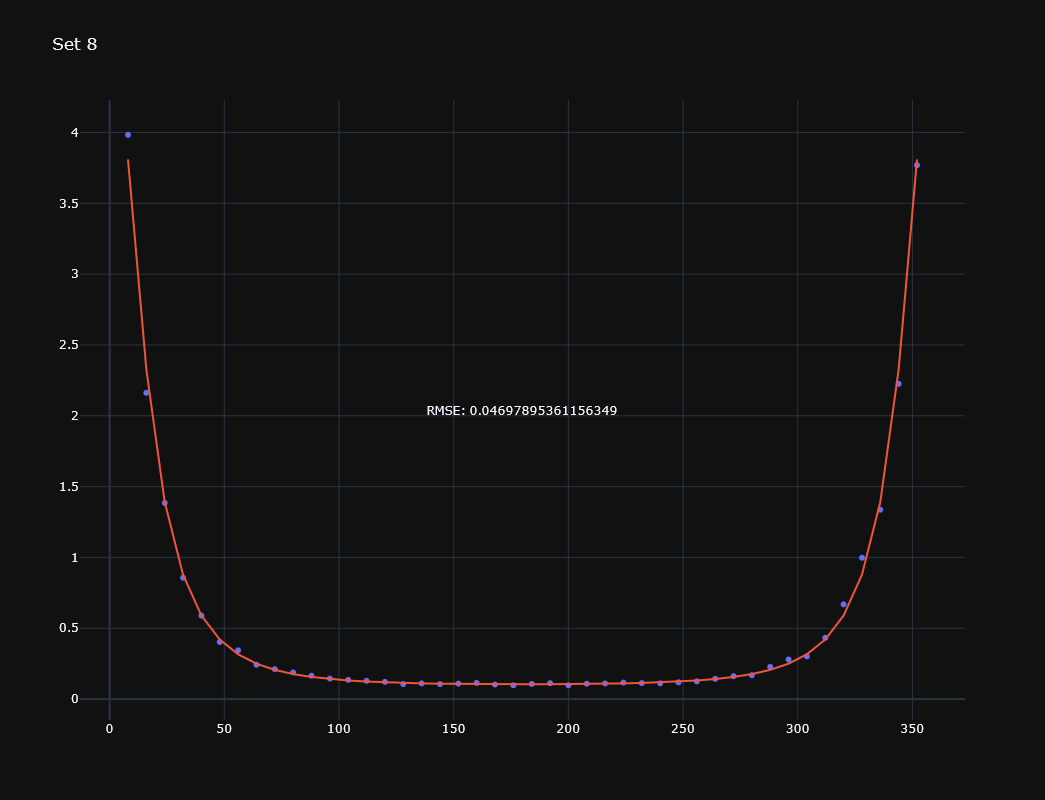

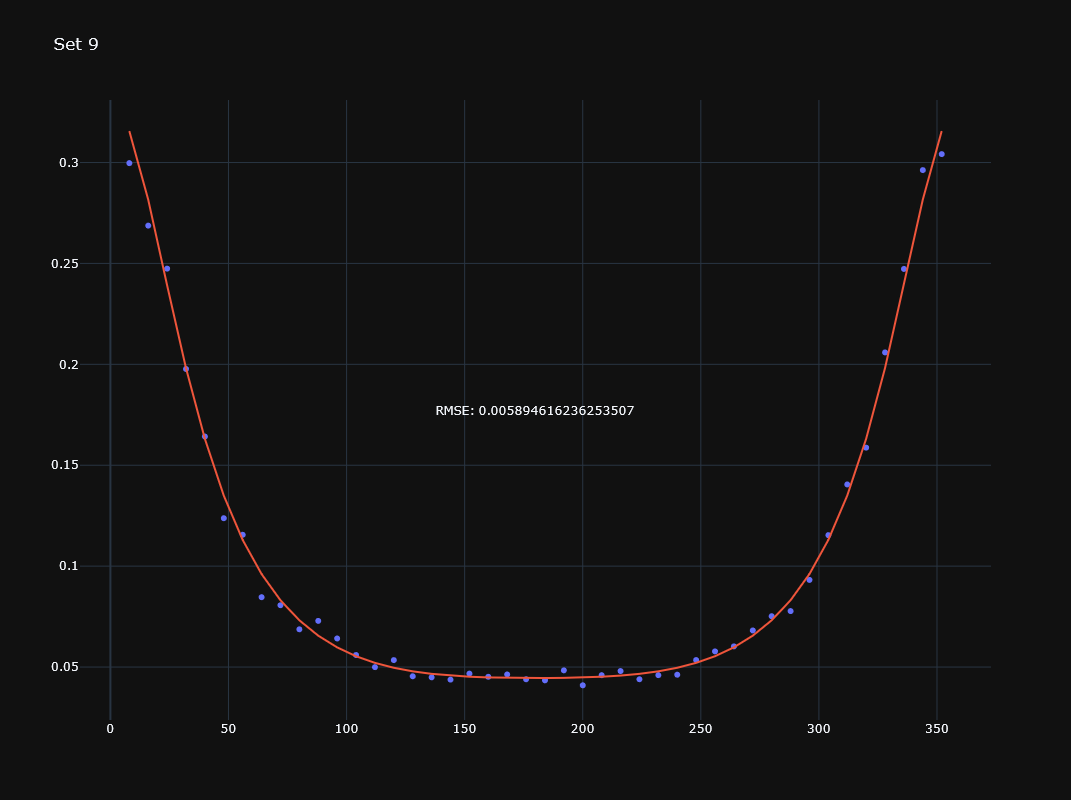

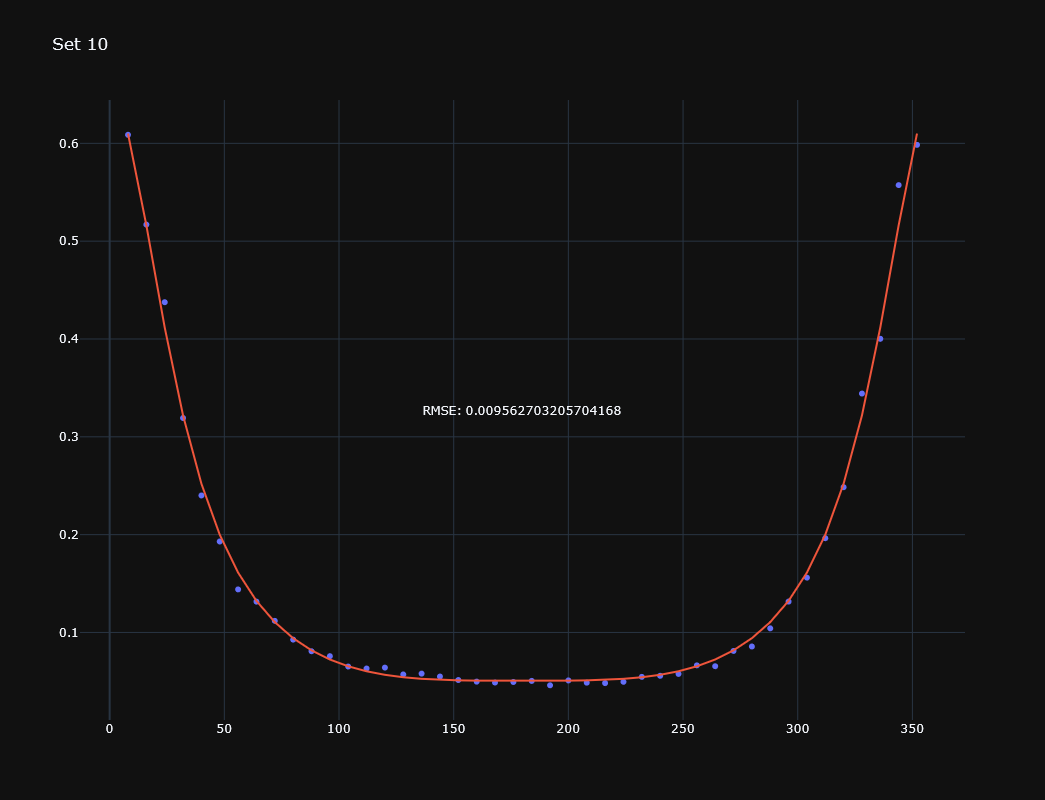

In [72]:
for x in range(0,10):
    try:
        cffplot(x)
    except: 
        print("")

0.03960576344847611


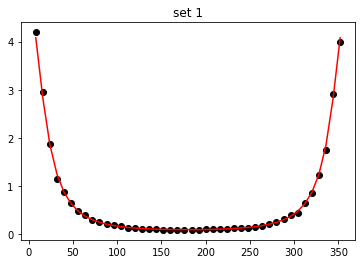

0.0035584994366305205


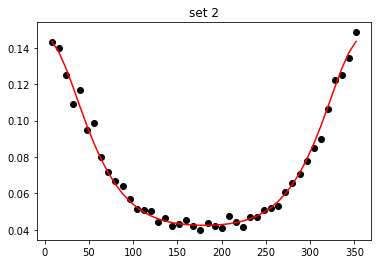

0.008212341393712231


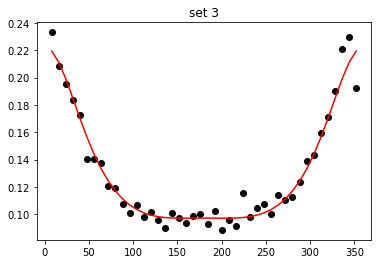

0.009017907292918084


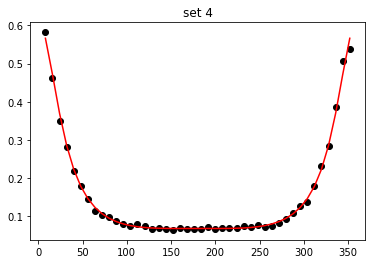

0.0028708309795870777


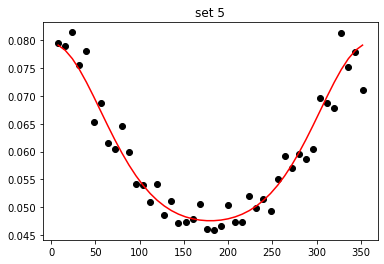

0.013603236148294623


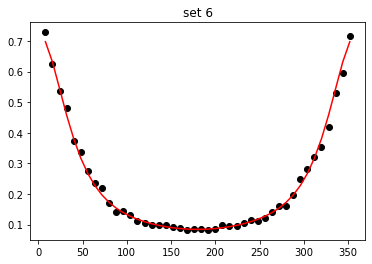

0.0025391611879458076


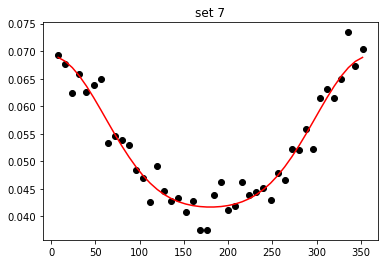

0.04697895361156349


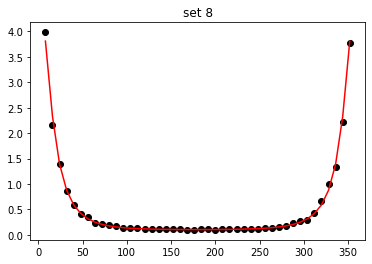

0.005894616236253507


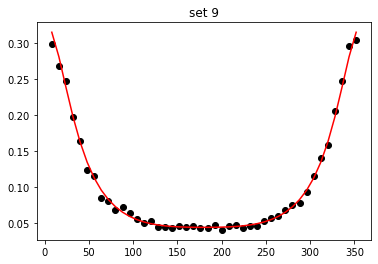

0.009562703205704168


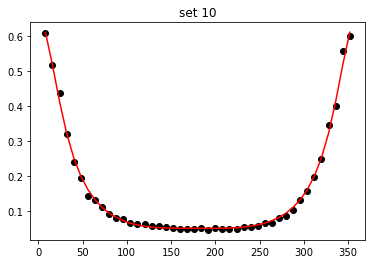

In [5]:
for x in range(0,10):
    try:
        cffplot(x)
    except: 
        print("")

# Epochs

In [30]:
def cffplotepochs(setNum, epochslist, itemsInSet = 45):
    
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=phi[a:b], y=F[a:b], mode='markers', name = 'F'))
    for epoch in epochslist:
        filename = "Results"+str(setNum)+ "_" + str(epoch) + ".csv"
        if epoch == 1000:
            filename = "Results"+str(setNum) + ".csv"
        cffs = pd.read_csv(filename)
        ReHfit = np.mean(cffs["ReH"])
        ReEfit = np.mean(cffs["ReE"])
        ReHTfit = np.mean(cffs["ReHtilde"])
        rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
        fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit), mode='lines', name=str(epoch)+" RMSE: "+str(rmse)))
        #fig.add_annotation(text="RMSE: "+str(rmse),showarrow=False)
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=True)#,width=800,height=800)
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    fig.show()

In [56]:
def cffdistplotepochs(setNum, epochslist):
    rehtfig = go.Figure()
    reefig = go.Figure()
    rehfig = go.Figure()
    
    
    for epoch in epochslist:
        data = pd.DataFrame(columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
        for x in range(1,setNum):
            filename = "Results"+str(x)+ "_" + str(epoch) + ".csv"
            if epoch == 1000:
                filename = "Results"+str(x) + ".csv"
            cffs = pd.read_csv(filename)
            #print(filename)
            ReHfit = np.mean(cffs["ReH"])
            ReEfit = np.mean(cffs["ReE"])
            ReHTfit = np.mean(cffs["ReHtilde"])
            size = cffs["ReH"].size
            size = 1
            ReHe = np.std(cffs["ReH"])/math.sqrt(size)
            ReEe = np.std(cffs["ReE"])/math.sqrt(size)
            ReHTe = np.std(cffs["ReHtilde"])/math.sqrt(size)
            cff = pd.DataFrame([[x+1, ReHfit, ReHe, ReEfit, ReEe, ReHTfit, ReHTe]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
            data=data.append(cff)
        rehfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReH"]), error_y=dict(type='data', array=np.array(data["ReHe"]), visible=True),mode='markers', name=str(epoch)))
        reefig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReE"]), error_y=dict(type='data', array=np.array(data["ReEe"]), visible=True),mode='markers', name=str(epoch)))    
        rehtfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReHT"]), error_y=dict(type='data', array=np.array(data["ReHTe"]), visible=True),mode='markers', name=str(epoch)))
        print(data)
    rehfig.update_layout(template="plotly_dark",title_text="ReH",showlegend=False)
    rehfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehfig.show()
    reefig.update_layout(template="plotly_dark",title_text="ReE",showlegend=False)
    reefig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    reefig.show()
    rehtfig.update_layout(template="plotly_dark",title_text="ReHT",showlegend=False)
    rehtfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehtfig.show()

  set       ReH      ReHe        ReE       ReEe       ReHT     ReHTe
0   2  1.306729  1.281159   0.976094  35.023244   5.416880  7.385532
0   3  2.387328  0.599830  -7.412985   4.969922   9.624104  3.512912
0   4 -0.942434  1.436355  27.126835  15.366210  -4.077635  4.607285
0   5  1.881648  0.231694   2.264469   1.139246   3.338756  2.461297
0   6  1.379084  1.129808 -70.206162  26.958653 -12.715971  7.265349
  set       ReH      ReHe        ReE       ReEe       ReHT     ReHTe
0   2  1.300426  1.586960   0.823137  43.672606   5.481934  9.210005
0   3  2.604948  0.821085  -9.379614   7.106764  10.720952  4.801177
0   4 -2.064517  1.529449  39.212563  16.261302  -7.475005  5.007431
0   5  1.987845  0.231846   0.757198   0.983040   4.318557  2.510501
0   6  1.342085  1.147794 -81.939702  33.912777 -15.808962  8.526946
  set       ReH      ReHe        ReE       ReEe       ReHT      ReHTe
0   2  1.378104  1.598250  -1.135653  44.069757   5.785500   9.234506
0   3  3.126125  1.361005 -14.02

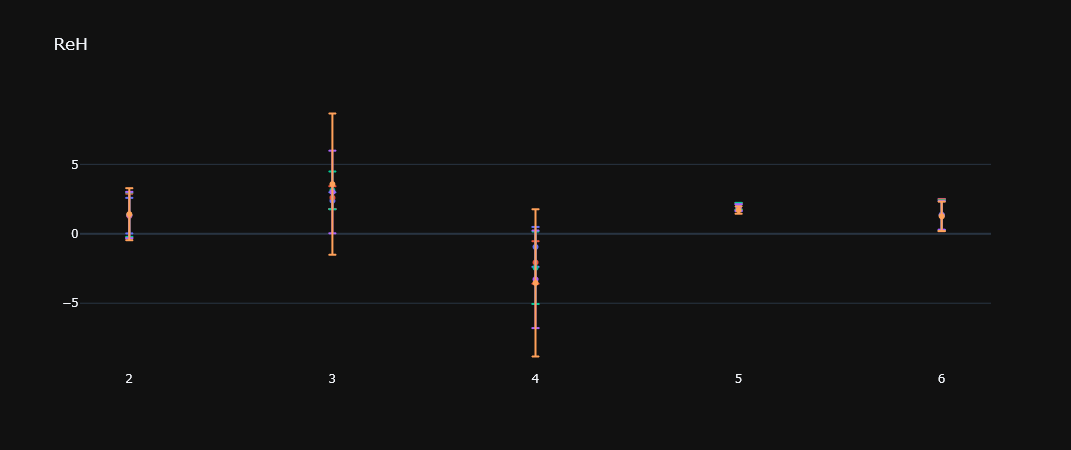

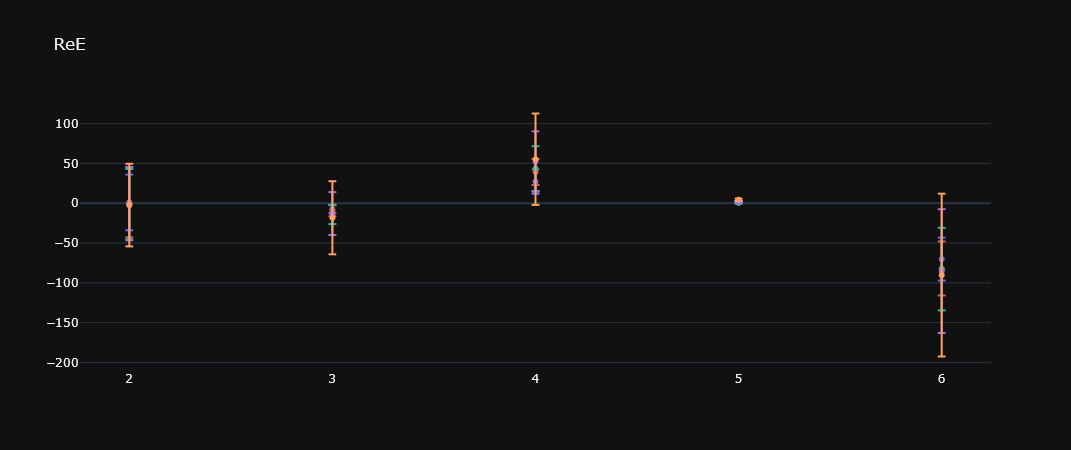

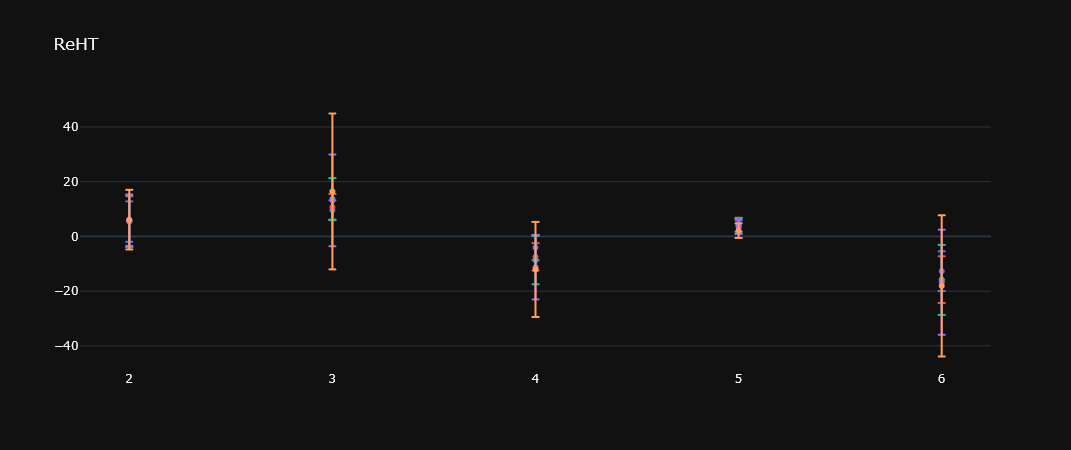

In [59]:
cffdistplotepochs(6, [100,200,300,500,1000])

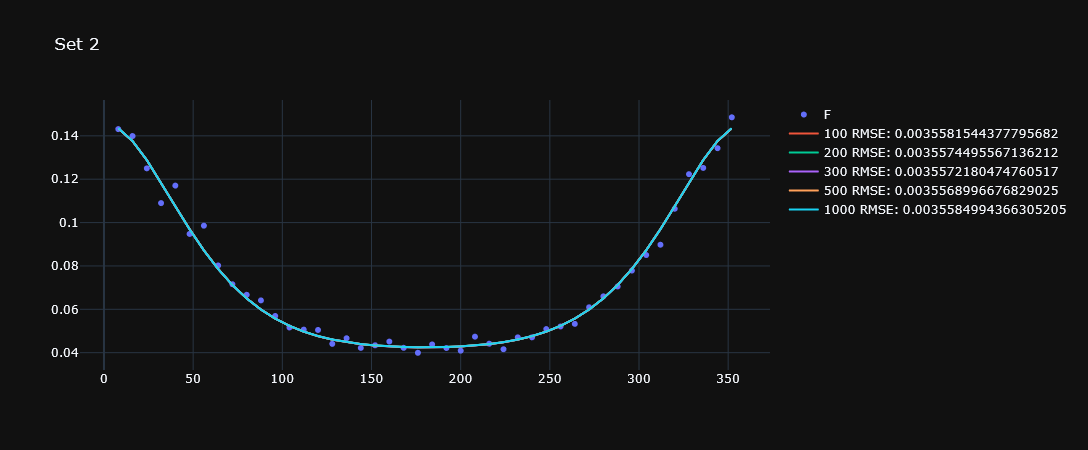

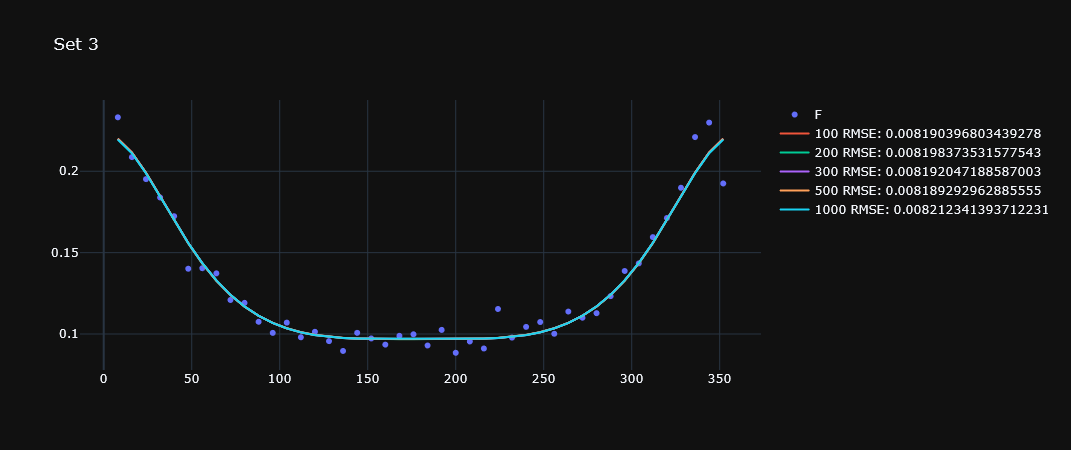

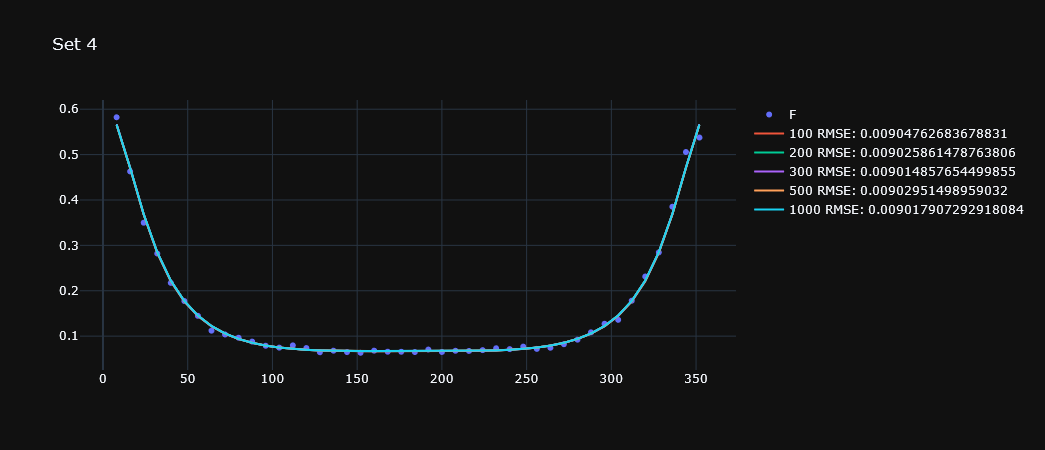

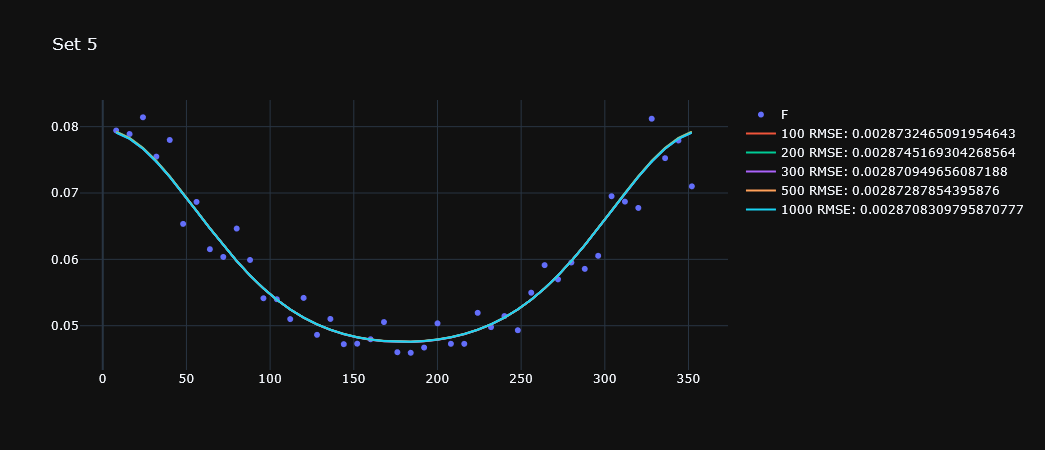

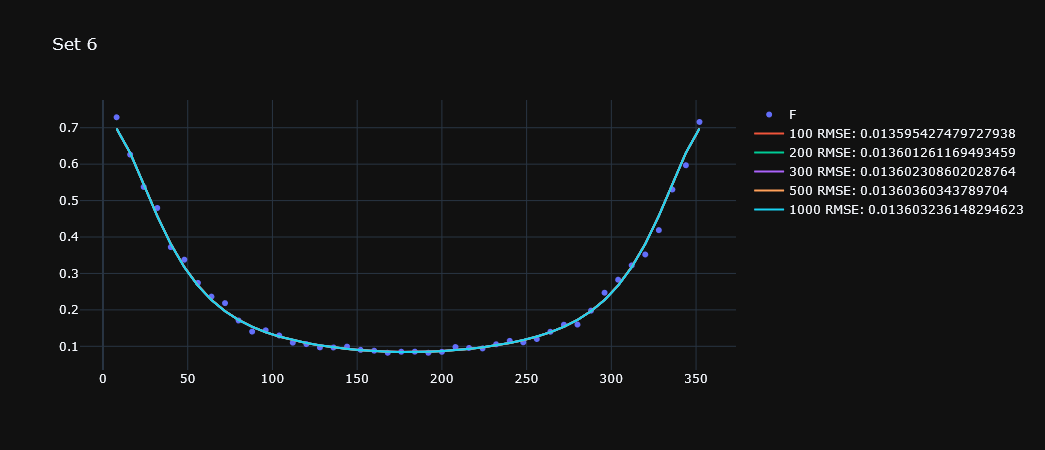

In [31]:
for x in range(1,6):
    cffplotepochs(x, [100,200,300,500,1000])

1
2
3
4
